<a href="https://colab.research.google.com/github/rileyseefeldt/MAT421/blob/main/HW17pt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Chapter 17. Interpolation cont.

##17.4 Lagrange Polynomial Interpolation

Lagrange polynomial interpolation is the process of finding a single polynomial that passes through all datapoints, as opposed to cubic spline interpolation which aims to finds multiple cubic polynomials. Mathematically, it is referred as L(x) and is calculated by the equation:

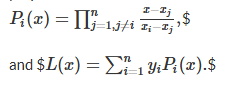

The first equation defines the Lagrange basis polynomial P(x) that equals one when x = xi and zero for all other xi, where j != i.

The second equation defines the Lagrange polynomial by multiplying each basis polynomial with its respective yi value

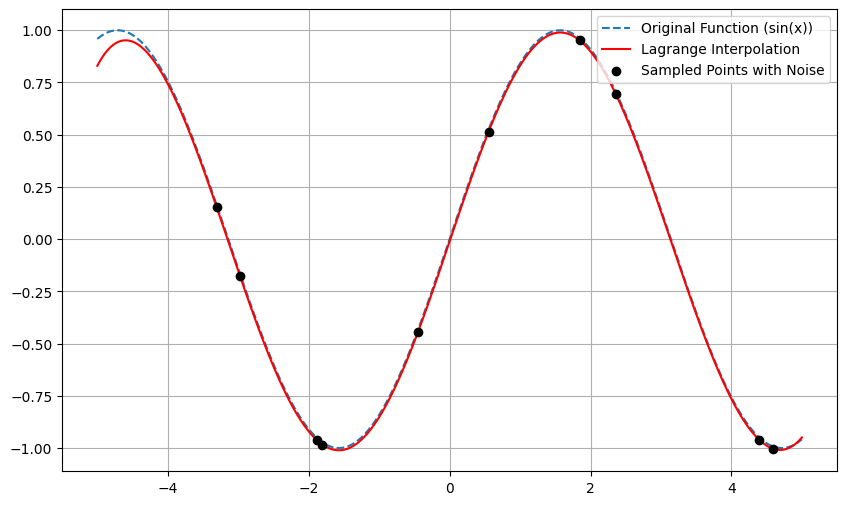

In [40]:
#lagrange polynomial example
import numpy as np
from scipy.interpolate import lagrange
import matplotlib.pyplot as plt

def f(x):
  #creates basic sin function with random noise
  return np.sin(x) + (0.02 * np.random.randn())

#generating 10 random x points between -5 5
x_points = np.sort(np.random.uniform(-5,5,10))
#generates corresponding y points according to equation defined above
y_points = f(x_points)

#computes lagrange polynomial from scipy
lagrange_interpolation = lagrange(x_points,y_points)

#generatning points for plotting
example_x = np.linspace(-5,5,400)
#finding predicted result
y_actual = np.sin(example_x)
#finding lagrange estimate
y_inter = lagrange_interpolation(example_x)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(example_x, y_actual, label="Original Function (sin(x))", linestyle="dashed")
plt.plot(example_x, y_inter, label="Lagrange Interpolation", color="red")
plt.scatter(x_points, y_points, color="black", zorder=3, label="Sampled Points with Noise")
plt.legend()
plt.grid(True)
plt.show()

##17.5 Newton’s Polynomial Interpolation

Newton's polynomial interpoloation is a way to fit exactly for a set of datapoints. For a polynomial of order n-1 the Newton polynmial is

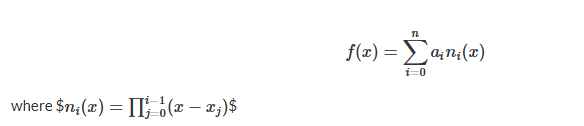

Creating a newton polynomial is a recursive process where:

the first basis polynomial is n0(x) = 1

the second basis polynomial is n1(x) = (x-x0)

the third basis polynomial is n1(x) = (x - x0)(x - x1)

this continues by multipling a (x-xj) term for every iteration


This polynomial interpolation is considered one of the best for large datasets because adding new points doesnt require re-calculation of old datapoints.




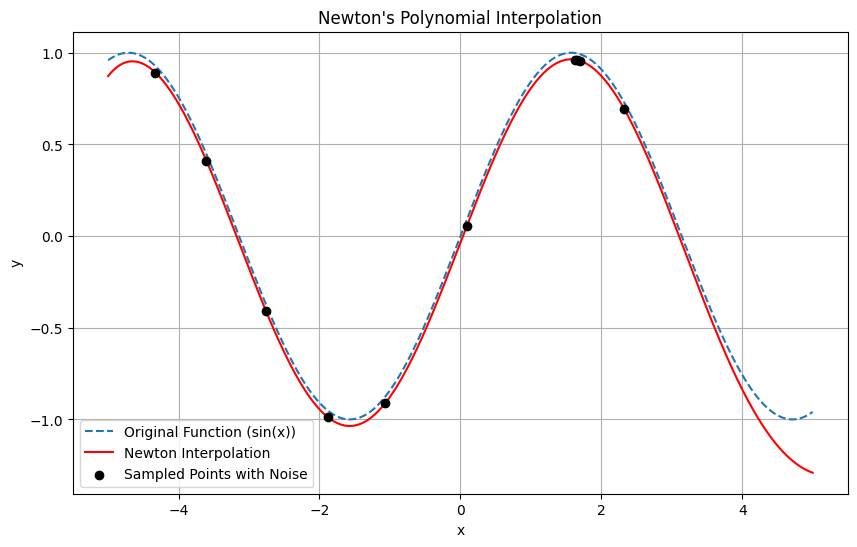

In [41]:
import numpy as np
import matplotlib.pyplot as plt

def divided_diff(x,y):
  #finding length of data
  n = len(x)
  #initialize coefficent array
  coef = np.zeros((n,n))
  #first column is y values
  coef[:, 0] = y

  #iterating the array
  for j in range(1,n):
    for i in range(n-j):
      coef[i, j] = (coef[i+1, j-1] - coef[i, j-1]) / (x[i+j] - x[i])

  return coef
def newton_inter(data, coef, x):
    #finding length of data
    n = len(data)
    #starting with first coefficent
    result = coef[0]
    #initial value of product term
    product_term = 1.0

    for i in range(1, n):
        #with each iteration multiples product term by (x-xj)
        product_term *= (x - data[i-1])
        #adds this to the result array
        result += coef[i] * product_term

    return result

def f(x):
  #creates basic sin function with random noise
  return np.sin(x) + (0.02 * np.random.randn())

#generating 10 random x points between -5 5
x_points = np.sort(np.random.uniform(-5,5,10))
#generates corresponding y points according to equation defined above
y_points = f(x_points)

#generatning points for plotting
example_x = np.linspace(-5,5,400)
#finding predicted result
y_actual = np.sin(example_x)

#finding newton estimate
# Computes coefficents
coefficients = divided_diff(x_points, y_points)[0]  # Only take the first row (coefficients)
# Compute Newton interpolation with coefficents
y_inter = np.array([newton_inter(x_points, coefficients, xi) for xi in example_x])


# Plot results
plt.figure(figsize=(10, 6))
plt.plot(example_x, y_actual, label="Original Function (sin(x))", linestyle="dashed")
plt.plot(example_x, y_inter, label="Newton Interpolation", color="red")
plt.scatter(x_points, y_points, color="black", zorder=3, label="Sampled Points with Noise")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Newton's Polynomial Interpolation")
plt.legend()
plt.grid(True)
plt.show()